In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import copy
from random import randrange
from sklearn.metrics import jaccard_score
import random

from sklearn.decomposition import PCA #for cluster analysis
from gensim.models import KeyedVectors #for word embeddings
import matplotlib.pyplot as plt #for plotting
import os #for importing
import pickle #for loading transcripts
from scipy.stats import pearsonr 

# from _DRAFT_20200604_functions import * #includes constants and score function
from tqdm import tqdm_notebook #for progress bar

%autosave 5

Autosaving every 5 seconds


# 0. Importing story and template vectors and sums 

In [2]:
templates = pickle.load( open( 'template_vc', "rb" ) )
stories = pickle.load( open( 'story_vc', "rb" ) )
# sums
sums = pickle.load( open( "new_sums", "rb" ) )

# I. Correlation between word vectors of recall and template word vectors
## A. Get a 2 X 3 matrix for each story

In [3]:
tcs = {}

for key in stories:
    # Making array stored in jaccard_vals
    this_array = np.zeros ((2,3))
    # Loc value
    lt = key % 10
    l_temp = templates[lt]
    # Soc value
    st = key - lt
    s_temp = templates[st]
    # Iterating through all conditions
    for i in range(0, 3):
        #location correlation vector
        l_corr = np.zeros((1, stories[key][i].shape[0]))
        # Social correlation vector
        s_corr = np.zeros((1, stories[key][i].shape[0]))
        #iterate through participants
        for j in range(0, stories[key][i].shape[0]):
            # Correlation w location template
            lc = np.corrcoef(stories[key][i][j], l_temp)
            l_corr[0, j] = lc[0,1]
            # Correlation w social template
            sc = np.corrcoef(stories[key][i][j], s_temp)
            s_corr[0, j] = sc[0,1]
        # Avg correlation values
        this_array[0, i] = np.mean(l_corr)
        this_array[1, i] = np.mean(s_corr)
    tcs[key] = this_array
            
            
            

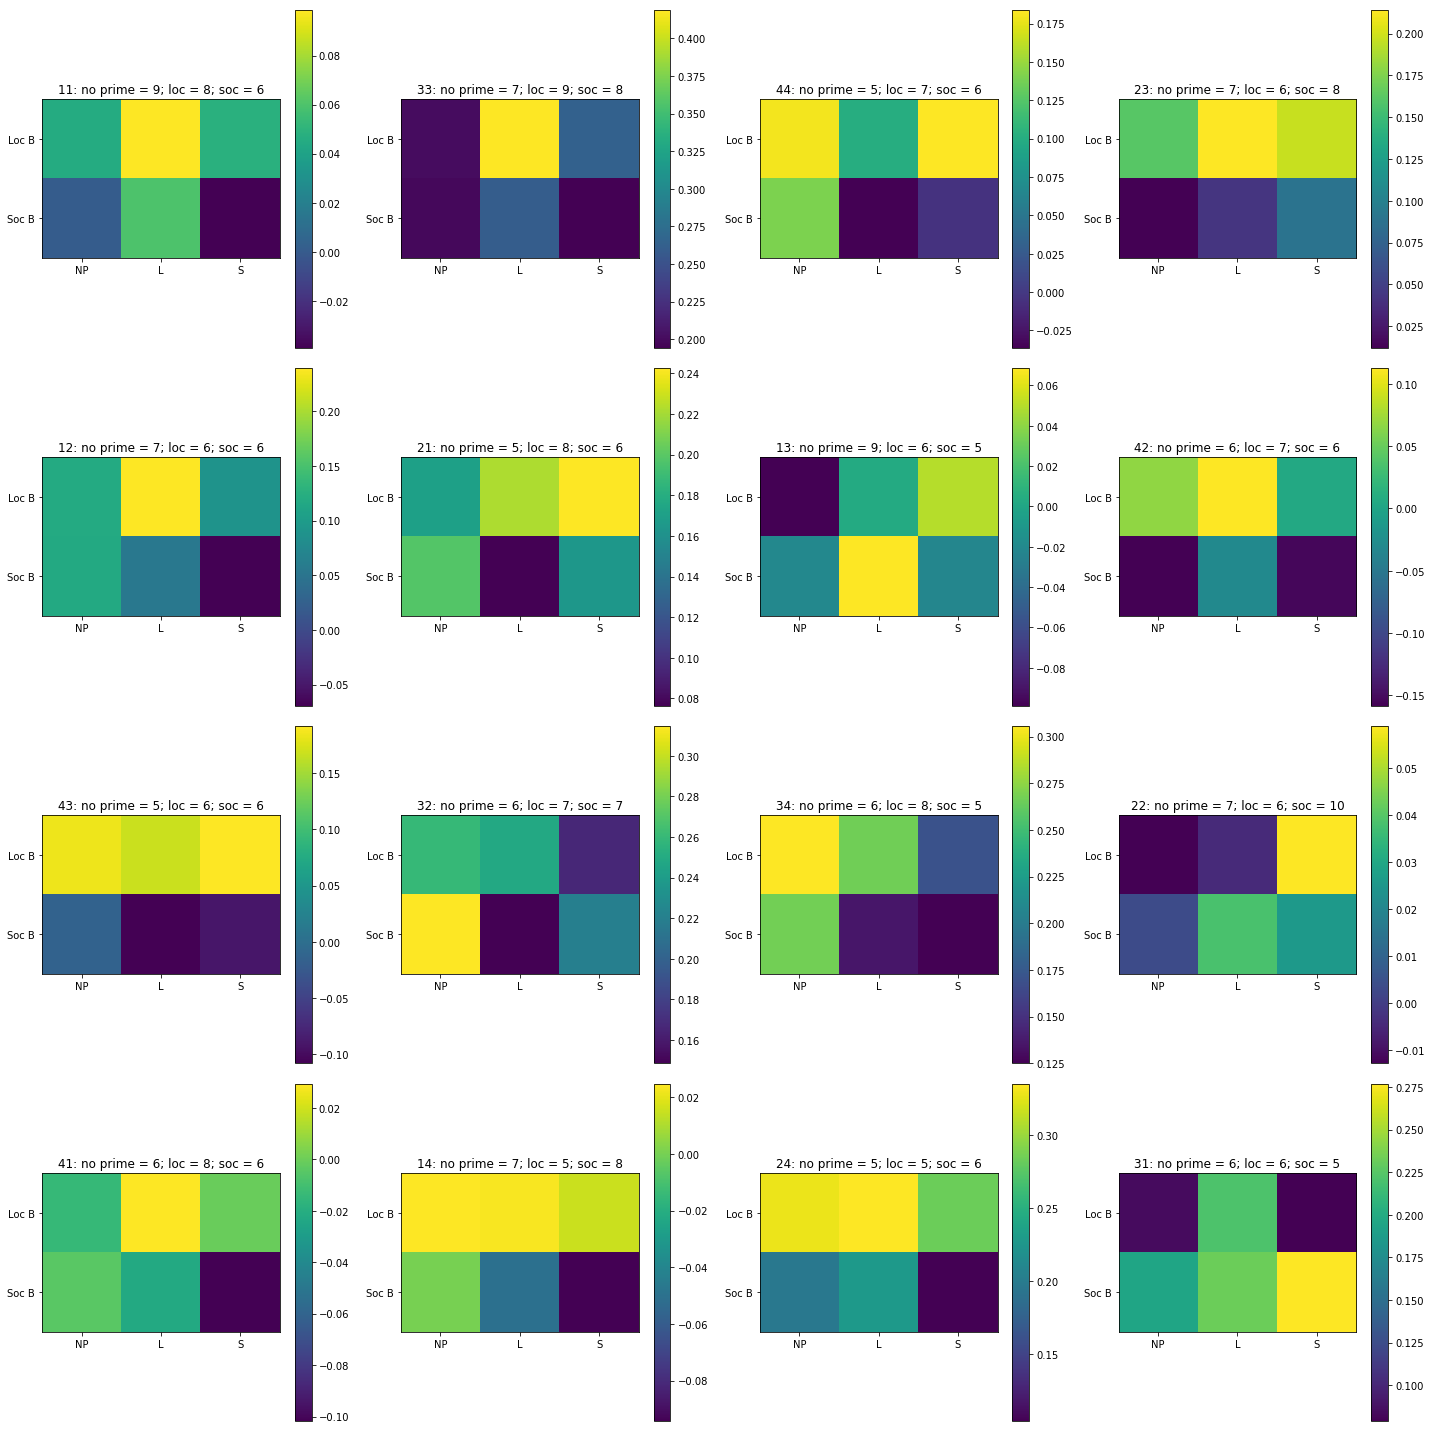

In [4]:
figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

i = 0
j = 0
for key in tcs:
    # Make the plot
    im = axes[j, i].imshow(tcs[key])
    
    #colorbar
    im.set_clim()
    figure.colorbar(im, ax=axes[j, i])
    
    #set title
    none_n = sums[key][1]
    loc_n = sums[key][2]
    soc_n = sums[key][3]
    axes[j, i].set_title(str(key) + ': no prime = ' + str(none_n) + '; loc = ' + str(loc_n) + '; soc = ' + str(soc_n))
    
    # X ticks
    x_label_list = ['NP', 'L', 'S']
    axes[j, i].set_xticks([0,1,2])
    axes[j, i].set_xticklabels(x_label_list)
    
    # Y ticks
    y_label_list = ['Loc B', 'Soc B']
    axes[j, i].set_yticks([0,1])
    axes[j, i].set_yticklabels(y_label_list)
     
    #changing i, j for next graph placement
    if i == 3:
        i = 0
        j += 1
    else:
        i += 1
    figure.tight_layout()

In [5]:
count = 0

for key in tcs:
    if count == 0:
        all_tcs = tcs[key]
        count =+ 1
    else:
        all_tcs = np.dstack((all_tcs, tcs[key]))

# NanMean
avg_tcs = np.nanmean(all_tcs, axis = 2)

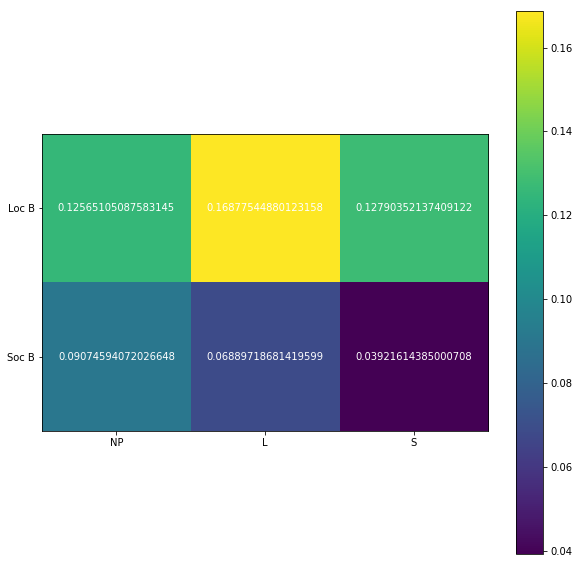

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
im = ax.imshow(avg_tcs)

fig.colorbar(im)

# X ticks
x_label_list = ['NP', 'L', 'S']
ax.set_xticks([0,1,2])
ax.set_xticklabels(x_label_list)

# Y ticks
y_label_list = ['Loc B', 'Soc B']
ax.set_yticks([0,1])
ax.set_yticklabels(y_label_list)

# Adding values to boxes
# Loop over data dimensions and create text annotations.
for i in range(0, 3):
    for j in range(0, 2):
        text = ax.text(i, j, avg_tcs[j, i], ha="center", va="center", color="w")